In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from utils import load_data, plot_history_tf, plot_heat_map


In [24]:
# Config
RATIO = 0.2
RANDOM_SEED = 42
EPOCHS = 50
BATCH_SIZE = 64
NUM_CLASSES = 15

In [25]:
# Load data
X_train, X_test, y_train, y_test = load_data(RATIO, RANDOM_SEED)
X_train = X_train[..., np.newaxis]   # shape (N,300,1)
X_test  = X_test[..., np.newaxis]

loading the ecg data of No.100
loading the ecg data of No.101
loading the ecg data of No.103
loading the ecg data of No.105
loading the ecg data of No.106
loading the ecg data of No.107
loading the ecg data of No.108
loading the ecg data of No.109
loading the ecg data of No.111
loading the ecg data of No.112
loading the ecg data of No.113
loading the ecg data of No.114
loading the ecg data of No.115
loading the ecg data of No.116
loading the ecg data of No.117
loading the ecg data of No.119
loading the ecg data of No.121
loading the ecg data of No.122
loading the ecg data of No.123
loading the ecg data of No.124
loading the ecg data of No.200
loading the ecg data of No.201
loading the ecg data of No.202
loading the ecg data of No.203
loading the ecg data of No.205
loading the ecg data of No.208
loading the ecg data of No.210
loading the ecg data of No.212
loading the ecg data of No.213
loading the ecg data of No.214
loading the ecg data of No.215
loading the ecg data of No.217
loading 

In [22]:
# 1D CNN model
def build_1d_cnn(input_shape=(300,1), num_classes=NUM_CLASSES):
    inp = layers.Input(shape=input_shape)
    x = layers.Conv1D(16, 9, activation='relu', padding='same')(inp)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(32, 7, activation='relu', padding='same')(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(64, 5, activation='relu', padding='same')(x)
    x = layers.MaxPool1D(2)(x)
    x = layers.Conv1D(128, 3, activation='relu', padding='same')(x)
    x = layers.GlobalAveragePooling1D()(x)
    x = layers.Dense(128, activation='relu')(x)
    out = layers.Dense(num_classes, activation='softmax')(x)
    return models.Model(inp, out)

In [16]:
model = build_1d_cnn()
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_2 (InputLayer)      │ (None, 300, 1)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_6 (Conv1D)               │ (None, 300, 32)        │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_4 (MaxPooling1D)  │ (None, 150, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_7 (Conv1D)               │ (None, 150, 64)        │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_5 (MaxPooling1D)  │ (None, 75, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_8 (Conv1D)               │ (None, 75, 128)        │        24,704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 15)             │         1,935 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,711 (209.81 KB)

 Trainable params: 53,711 (209.81 KB)

 Non-trainable params: 0 (0.00 B)

In [17]:
cb = [callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
history = model.fit(X_train, y_train, validation_data=(X_test, y_test),
                    epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=cb)

Epoch 1/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 32s 25ms/step - accuracy: 0.8061 - loss: 0.6925 - val_accuracy: 0.8549 - val_loss: 0.4994
Epoch 2/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 27s 22ms/step - accuracy: 0.8875 - loss: 0.3829 - val_accuracy: 0.9149 - val_loss: 0.3100
Epoch 3/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 31s 26ms/step - accuracy: 0.9240 - loss: 0.2787 - val_accuracy: 0.9343 - val_loss: 0.2601
Epoch 4/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 68s 47ms/step - accuracy: 0.9395 - loss: 0.2320 - val_accuracy: 0.9414 - val_loss: 0.2341
Epoch 5/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 57s 47ms/step - accuracy: 0.9496 - loss: 0.2002 - val_accuracy: 0.9459 - val_loss: 0.2167
Epoch 6/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 92s 55ms/step - accuracy: 0.9548 - loss: 0.1772 - val_accuracy: 0.9563 - val_loss: 0.1771
Epoch 7/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 81s 54ms/step - accuracy: 0.9597 - loss: 0.1612 - val_accuracy: 0.9612 - val_loss: 0.1596
Epoch 8/50
1217/1217 ━━━━━━━━━━━━━━━━━━━━ 84s 55ms/step - accuracy: 0.9620 -

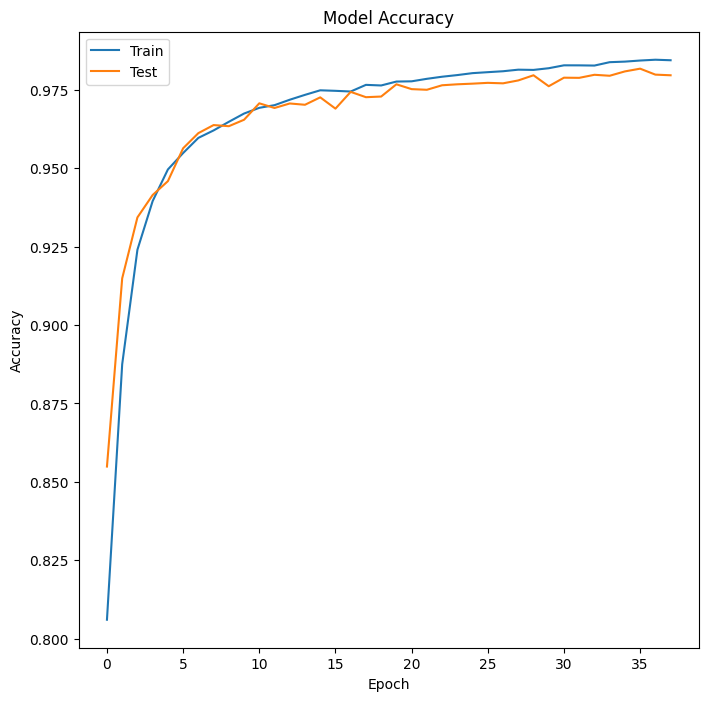

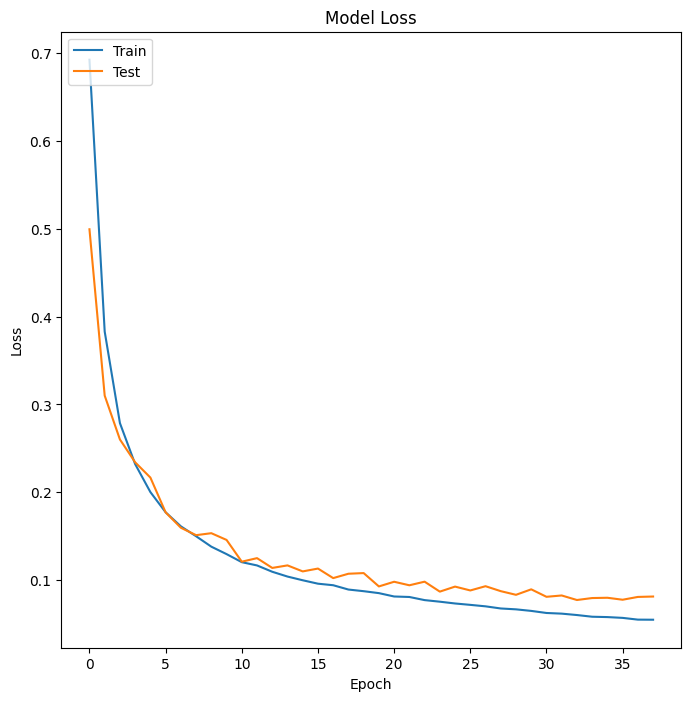

609/609 ━━━━━━━━━━━━━━━━━━━━ 8s 11ms/step


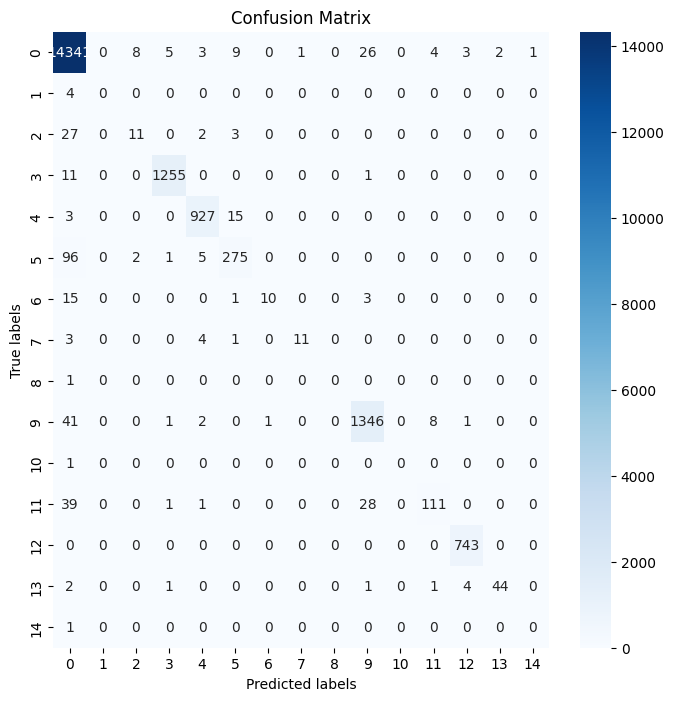

In [18]:
# Plot results
plot_history_tf(history)

# Confusion matrix
y_pred = np.argmax(model.predict(X_test), axis=-1)
plot_heat_map(y_test, y_pred)

In [19]:
# Save the trained 1D CNN model
model.save("ecg_1d_cnn.h5")
print("✅ 1D CNN model saved as ecg_1d_cnn.h5")

✅ 1D CNN model saved as ecg_1d_cnn.h5


In [20]:
score = model.evaluate(X_test, y_test, verbose=2)

609/609 - 7s - 11ms/step - accuracy: 0.9798 - loss: 0.0773


In [21]:
print(score)

[0.07727500051259995, 0.9797616600990295]
